<a href="https://colab.research.google.com/github/PasinduSankalpaSearasingha/Titanic/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install kaggle

In [3]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:27<00:00, 148MB/s]
100% 2.29G/2.29G [00:27<00:00, 89.0MB/s]


In [5]:
from zipfile import ZipFile
dataset = '/content/chest-xray-pneumonia.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

chest_xray  chest-xray-pneumonia.zip  sample_data


In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [8]:

import random


image_directory = '/content/chest_xray/train/PNEUMONIA'


percentage_to_remove = 0.6941935483870968

all_images = os.listdir(image_directory)
num_images_to_remove = int(len(all_images) * percentage_to_remove)


images_to_remove = random.sample(all_images, num_images_to_remove)

for image_name in images_to_remove:
    image_path = os.path.join(image_directory, image_name)
    os.remove(image_path)



In [9]:
normal = os.listdir('/content/chest_xray/train/NORMAL')
print(normal[0:5])
print(normal[-5:])

normal_test = os.listdir('/content/chest_xray/test/NORMAL')

['NORMAL2-IM-1018-0001.jpeg', 'NORMAL2-IM-0825-0001.jpeg', 'IM-0203-0001.jpeg', 'NORMAL2-IM-1152-0001.jpeg', 'NORMAL2-IM-0445-0001.jpeg']
['NORMAL2-IM-1345-0001.jpeg', 'NORMAL2-IM-0834-0001.jpeg', 'NORMAL2-IM-0553-0001.jpeg', 'IM-0532-0001.jpeg', 'NORMAL2-IM-1277-0001.jpeg']


In [10]:
pneumonia = os.listdir('/content/chest_xray/train/PNEUMONIA')
print(pneumonia[0:5])
print(pneumonia[-5:])

pneumonia_test = os.listdir('/content/chest_xray/test/PNEUMONIA')

['person403_bacteria_1814.jpeg', 'person714_bacteria_2615.jpeg', 'person65_bacteria_322.jpeg', 'person1139_bacteria_3081.jpeg', 'person755_bacteria_2659.jpeg']
['person748_virus_1373.jpeg', 'person301_virus_622.jpeg', 'person1525_virus_2659.jpeg', 'person498_bacteria_2102.jpeg', 'person51_bacteria_242.jpeg']


In [11]:
print(len(normal))
print(len(pneumonia))
print(len(normal_test))
print(len(pneumonia_test))
print(type(normal))
print(type(pneumonia))

1341
1185
234
390
<class 'list'>
<class 'list'>


In [12]:
normal_labels=[0]*1341
pneumonia_labels=[1]*1185
normal_test_labels=[0]*234
pneumonia_test_labels=[1]*390

In [13]:

print(normal_labels[0:5])
print(pneumonia_labels[0:5])
print(normal_test_labels[0:5])
print(pneumonia_test_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


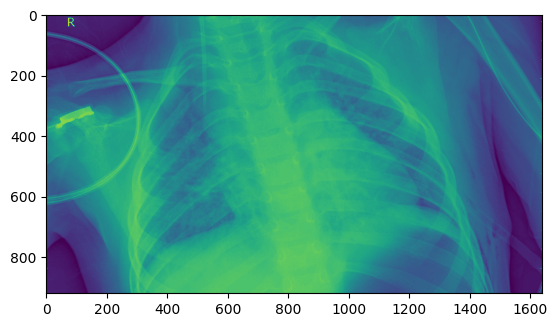

In [16]:
img = mpimg.imread('/content/chest_xray/train/PNEUMONIA/person403_bacteria_1814.jpeg')
imgplot = plt.imshow(img)
plt.show()

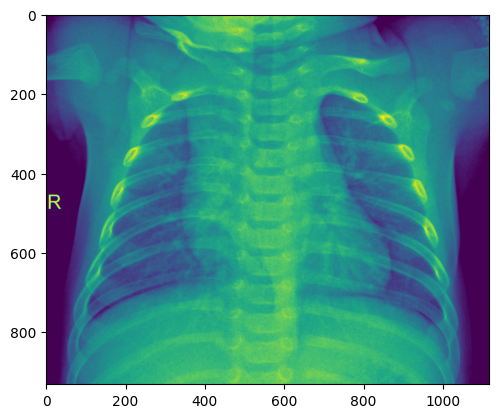

In [17]:
img = mpimg.imread('/content/chest_xray/train/NORMAL/IM-0693-0001.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [18]:
pneumonia_path = '/content/chest_xray/train/PNEUMONIA/'

data = []

for img_file in pneumonia:

  image = Image.open(pneumonia_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

pneumonia_test_path = '/content/chest_xray/test/PNEUMONIA/'


for img_test_file in pneumonia_test:

  image = Image.open(pneumonia_test_path + img_test_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

normal_path = '/content/chest_xray/train/NORMAL/'


for img_file in normal:

  image = Image.open(normal_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


normal_test_path = '/content/chest_xray/test/NORMAL/'


for img_test_file in normal_test:

  image = Image.open(normal_test_path + img_test_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

array([[[61, 61, 61],
        [48, 48, 48],
        [50, 50, 50],
        ...,
        [61, 61, 61],
        [56, 56, 56],
        [53, 53, 53]],

       [[49, 49, 49],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [60, 60, 60],
        [56, 56, 56],
        [53, 53, 53]],

       [[50, 50, 50],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [61, 61, 61],
        [56, 56, 56],
        [54, 54, 54]],

       ...,

       [[47, 47, 47],
        [47, 47, 47],
        [56, 56, 56],
        ...,
        [ 2,  2,  2],
        [ 7,  7,  7],
        [ 9,  9,  9]],

       [[46, 46, 46],
        [48, 48, 48],
        [56, 56, 56],
        ...,
        [ 1,  1,  1],
        [ 7,  7,  7],
        [10, 10, 10]],

       [[45, 45, 45],
        [49, 49, 49],
        [57, 57, 57],
        ...,
        [ 3,  3,  3],
        [ 8,  8,  8],
        [11, 11, 11]]], dtype=uint8)
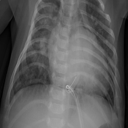

In [19]:
data[1]

In [20]:
labels = pneumonia_labels + pneumonia_test_labels + normal_labels + normal_test_labels

print(len(labels))
print(len(data))
print(labels[0:5])
print(labels[-5:])

3150
3150
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [21]:
X = np.array(data)
Y = np.array(labels)


In [22]:
print(len(X))

3150


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(3150, 128, 128, 3) (2520, 128, 128, 3) (630, 128, 128, 3)


In [25]:
X_train_scaled = X_train/255

X__test_scaled = X_test/255

In [26]:

X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.21960784, 0.21960784, 0.21960784],
        [0.2       , 0.2       , 0.2       ],
        [0.16862745, 0.16862745, 0.16862745]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.20784314, 0.20784314, 0.20784314],
        [0.18039216, 0.18039216, 0.18039216],
        [0.14901961, 0.14901961, 0.14901961]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.19215686, 0.19215686, 0.19215686],
        [0.16470588, 0.16470588, 0.16470588],
        [0.13333333, 0.13333333, 0.13333333]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [27]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [29]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [30]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
71/71 [==============================] - 63s 863ms/step - loss: 0.5767 - acc: 0.7015 - val_loss: 0.2503 - val_acc: 0.9167
Epoch 2/5
71/71 [==============================] - 58s 817ms/step - loss: 0.3070 - acc: 0.8867 - val_loss: 0.1577 - val_acc: 0.9365
Epoch 3/5
71/71 [==============================] - 57s 809ms/step - loss: 0.2426 - acc: 0.9070 - val_loss: 0.1475 - val_acc: 0.9524
Epoch 4/5
71/71 [==============================] - 56s 794ms/step - loss: 0.2241 - acc: 0.9220 - val_loss: 0.1343 - val_acc: 0.9603
Epoch 5/5
71/71 [==============================] - 58s 812ms/step - loss: 0.1786 - acc: 0.9277 - val_loss: 0.1404 - val_acc: 0.9484


In [31]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

20/20 [==============================] - 4s 192ms/step - loss: 34.7331 - acc: 0.9111
Test Accuracy = 0.9111111164093018


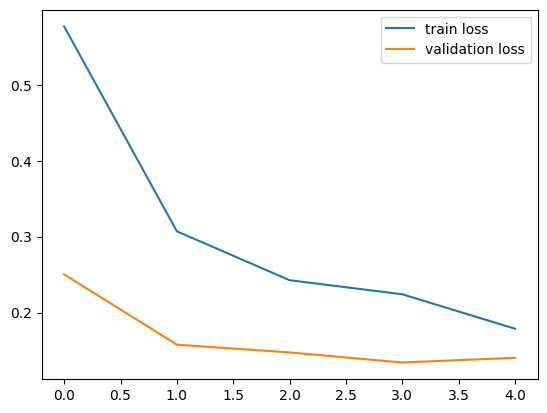

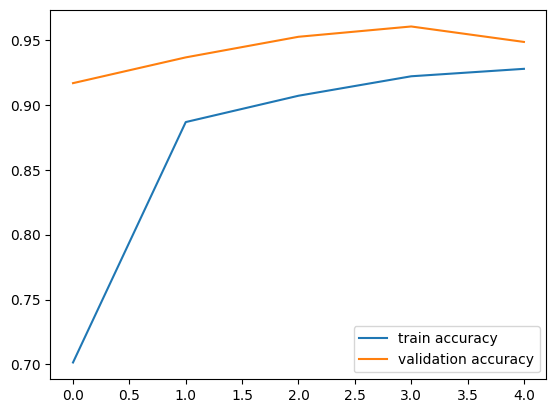

In [32]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()



In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('pneumonia')

else:

  print('normal')

Path of the image to be predicted: /content/th.jpeg


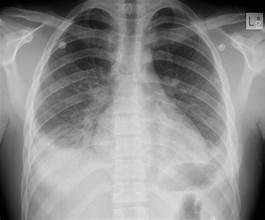

1/1 [==============================] - 0s 17ms/step
[[0.552656   0.49808818]]
0
normal


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('pneumonia')

else:

  print('normal')

Path of the image to be predicted: /content/th (3).jpeg


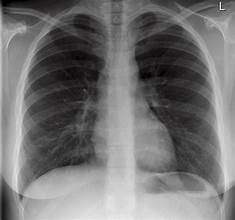

1/1 [==============================] - 0s 47ms/step
[[0.14286007 0.84792876]]
1
pneumonia


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('pneumonia')

else:

  print('normal')